<a href="https://colab.research.google.com/github/CrucifierBladex/ml_regression/blob/main/Gas_Turbine_CO_and_NOx_regression_tey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
df=pd.read_csv('/content/gt_2015.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


In [29]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


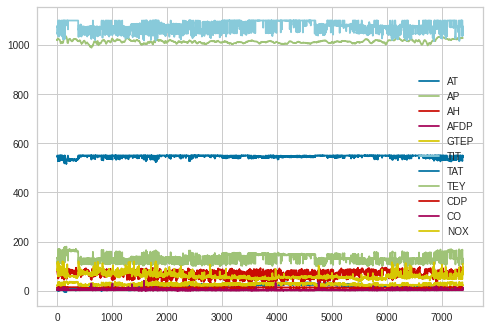

In [30]:
df.plot()

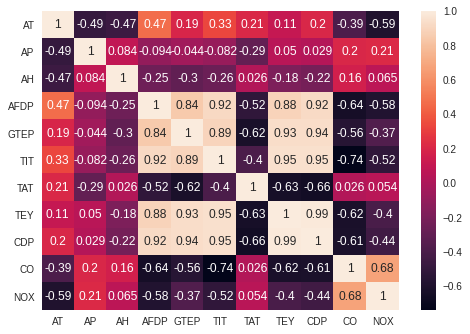

In [31]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [32]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.493098,-0.466288,0.468976,0.193578,0.330112,0.208277,0.109437,0.200909,-0.390647,-0.593580
AP,-0.493098,1.000000,0.084381,-0.094144,-0.043730,-0.081605,-0.290147,0.050326,0.029420,0.200945,0.214236
AH,-0.466288,0.084381,1.000000,-0.245456,-0.297708,-0.260683,0.026251,-0.182732,-0.221706,0.158999,0.065351
AFDP,0.468976,-0.094144,-0.245456,1.000000,0.843958,0.915128,-0.519807,0.884954,0.922991,-0.640789,-0.584452
GTEP,0.193578,-0.043730,-0.297708,0.843958,1.000000,0.892851,-0.620652,0.932337,0.938142,-0.557177,-0.366655
TIT,0.330112,-0.081605,-0.260683,0.915128,0.892851,1.000000,-0.396161,0.951813,0.951590,-0.738092,-0.520081
TAT,0.208277,-0.290147,0.026251,-0.519807,-0.620652,-0.396161,1.000000,-0.633933,-0.656613,0.025768,0.054455
TEY,0.109437,0.050326,-0.182732,0.884954,0.932337,0.951813,-0.633933,1.000000,0.991207,-0.616791,-0.403278
CDP,0.200909,0.029420,-0.221706,0.922991,0.938142,0.951590,-0.656613,0.991207,1.000000,-0.612653,-0.443093
CO,-0.390647,0.200945,0.158999,-0.640789,-0.557177,-0.738092,0.025768,-0.616791,-0.612653,1.000000,0.678394


In [33]:
import plotly.express as px
fig=px.scatter(df,x='AT',y='TEY',color=df['AT'])
fig.show()

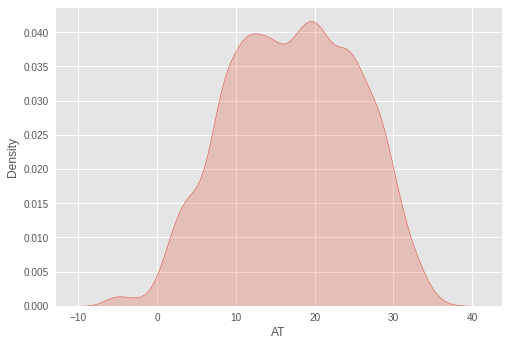

In [51]:
sns.kdeplot(df['AT'],shade=True)

In [34]:
x=df.drop(['TEY'],axis=1)
y=df['TEY'].values

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



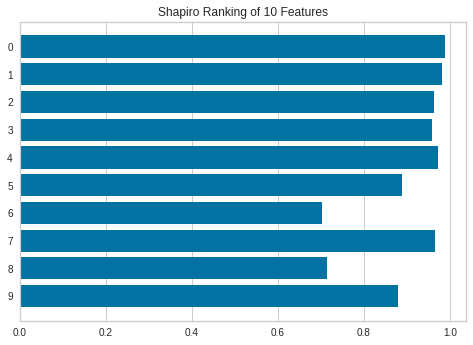

In [36]:
from yellowbrick.features import Rank1D,Rank2D
visualizer=Rank1D()
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.poof()

In [37]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,x_test)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
y_pred=model.predict(y_train)

In [39]:
y_pred

array([149.0734, 134.7174, 110.1022, ..., 128.8165, 150.1048, 130.8234])

In [40]:
metrics.mean_squared_error(y_test,y_pred)

0.47503502331753716

In [47]:
model.score(y_train,y_test)

0.9981798714947343

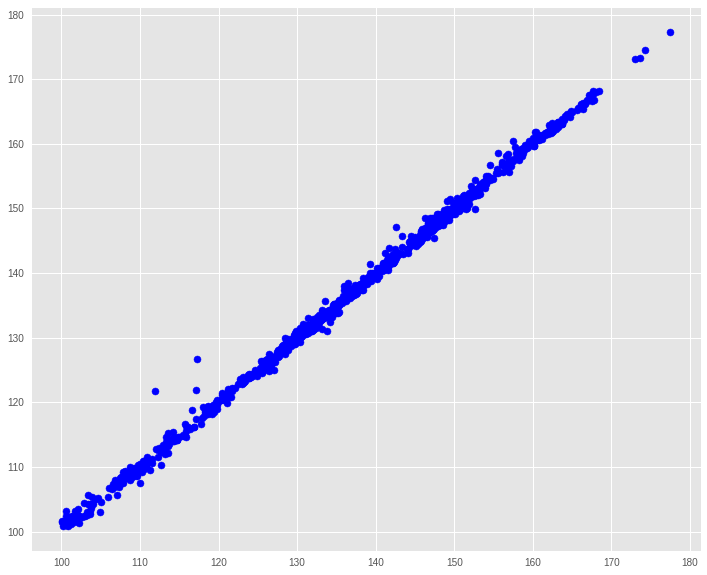

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(12,10))
plt.scatter(y_test,y_pred,c='blue')
plt.show()

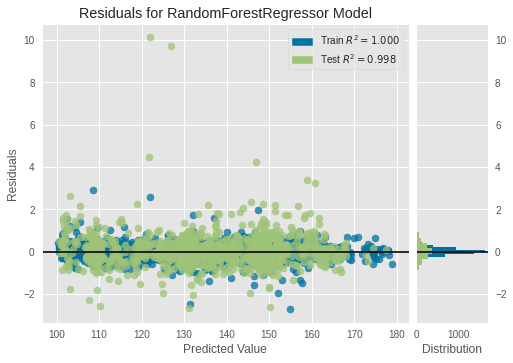

In [48]:
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(model)
visualizer.fit(x_train,x_test)
visualizer.score(y_train,y_test)
visualizer.poof()

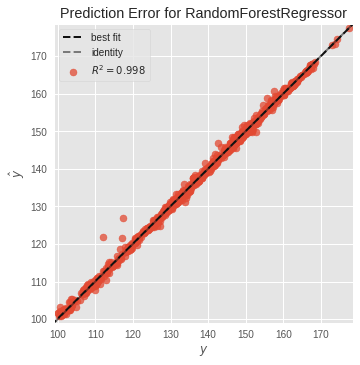

In [49]:
from yellowbrick.regressor import PredictionError
visualizer=PredictionError(model)
visualizer.fit(x_train,x_test)
visualizer.score(y_train,y_test)
visualizer.poof()

In [52]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [57]:
w=df.iloc[0]
w_=w.to_dict()

In [58]:
w_

{'AFDP': 2.5304,
 'AH': 84.985,
 'AP': 1020.1,
 'AT': 1.9532,
 'CDP': 10.799000000000001,
 'CO': 7.4491,
 'GTEP': 20.116,
 'NOX': 113.25,
 'TAT': 544.92,
 'TEY': 116.27,
 'TIT': 1048.7}

In [60]:
test_frame={'AFDP': 2.5304,
 'AH': 84.985,
 'AP': 1020.1,
 'AT': 1.9532,
 'CDP': 10.799000000000001,
 'CO': 7.4491,
 'GTEP': 20.116,
 'NOX': 113.25,
 'TAT': 544.92,
 'TIT': 1048.7}
test=pd.DataFrame(test_frame,index=[0])

In [62]:
test=scaler.fit_transform(test)

In [63]:
model.predict(test)

array([133.8149])

In [64]:
model.feature_importances_

array([9.51926833e-03, 3.96550487e-04, 2.33650441e-04, 1.62011714e-03,
       1.51806164e-03, 1.61981102e-02, 1.44995818e-03, 9.68405649e-01,
       1.66804842e-04, 4.91829907e-04])

In [72]:
x.shape

(7384, 10)

In [75]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [77]:
names=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']


10

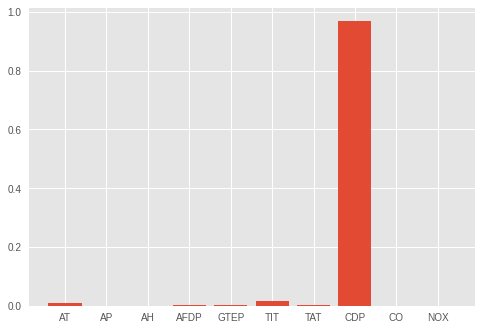

In [83]:
plt.bar(range(x.shape[1]),model.feature_importances_)
plt.xticks(range(x.shape[1]),['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX'])
plt.show()

In [84]:
np.cov(df['CDP'],df['TEY'])

array([[  1.29186078,  18.22760588],
       [ 18.22760588, 261.76678424]])

In [85]:
np.corrcoef(df['CDP'],df['TEY'])

array([[1.        , 0.99120733],
       [0.99120733, 1.        ]])